## Scraping OMX C20 stock prices from Nasdaq using Selenium and Chromedriver

In [8]:
#Data importet pr. 28-08-2018
from selenium import webdriver
import os.path


browser =webdriver.Chrome("C:/Users/ander/Downloads/chromedriver_win32/chromedriver.exe") # define path to your chromedriver

tickers={'MAERSK_B':'CSE3201','CARL_B':'CSE1596',\
         'COLO_B':'CSE3203','DANSKE':'CSE1586','DSV':'CSE3415',\
         'JYSK':'CSE1587','NDA_DKK':'CSE4861','NOVO_B':'CSE1158',\
         'NZYM_B':'CSE11273','TRYG':'CSE31315','VWS':'CSE3258','LUN':'CSE3853',\
         'ALMB':'CSE3340','SAS':'CSE13584'}

for i in tickers:
    urlblok=tickers.get(i)
    nasdurl='http://www.nasdaqomxnordic.com/aktier/microsite?Instrument=' + str(urlblok)
    browser.get(nasdurl) # opens a webpage using the browser objects get method.
    selector = '.showHistory > span:nth-child(1)' # define selector to the email field
    element = browser.find_element_by_css_selector(selector) # find this element using the .find_element_by_css_selector method
    element.click()
    selector='#fromDate'
    element = browser.find_element_by_css_selector(selector)
    startdate='2006-01-02' #Setting start date
    element.send_keys(startdate) # send the data
    selector='#btnUpdate > span:nth-child(1)'
    element=browser.find_element_by_css_selector(selector)
    element.click()
    selector='#exportExcel' #Downloading the data to the computer
    element=browser.find_element_by_css_selector(selector)
    element.click()

## Figures to introduction

In [1]:
#Figur 1  - taken manually from https://www.jobindex.dk/jobsoegning/analyse-kilder

import matplotlib.pyplot as plt
import matplotlib

#Job adds sources per. 26-08-2018
jobsammensætning={'Other job databases':3783, 'Jobcenter':3957,\
                  "Firm's job pages":285,"Jobindex":5745}
dictval=[]

for key, value in jobsammensætning.items():
    temp = [value]
    dictval.append(temp)


fig1, ax1 = plt.subplots()
ax1.pie(dictval, labels=jobsammensætning.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.savefig('Fig1.png')

<Figure size 640x480 with 0 Axes>

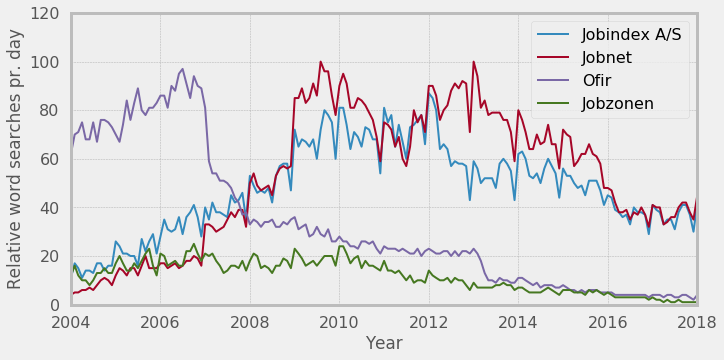

In [265]:
#Figur 2  - downloaded manually from https://trends.google.dk/trends/explore?date=all&geo=DK&q=%2Fm%2F0kbgkxk,Jobnet,Ofir,Jobzonen

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
figure(figsize=(10,5))

#Job adds sources per. 26-08-2018
fig2_sti='C:/Users/ander/Desktop/group19/Eksamensprojekt/multiTimeline.csv'
fig2_csv=fig2_sti
df_fig2= pd.read_csv(fig2_csv, header=1)
df_fig2['Month'] = pd.to_datetime(df_fig2['Month'])
df_fig2.columns=['Year','Jobindex A/S', 'Jobnet', 'Ofir', 'Jobzonen']
#df_fig2.set_index('Year', inplace=True)
#df_fig2.plot.line()
plt.plot(df_fig2['Year'], df_fig2['Jobindex A/S'])
plt.plot(df_fig2['Year'], df_fig2['Jobnet'])
plt.plot(df_fig2['Year'], df_fig2['Ofir'])
plt.plot(df_fig2['Year'], df_fig2['Jobzonen'])
plt.xlabel('Year')
plt.ylabel('Relative word searches pr. day')
plt.ylim(0,120)
plt.xlim('01-01-2004','01-01-2018')
plt.legend()
plt.savefig('Fig2.png')

